In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [138]:
df = pd.read_csv("../cluster/mall_customers-cluster.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [139]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (200, 5)
Cleaned shape: (200, 5)


/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_59307/2329768257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Gender', palette='Set2')


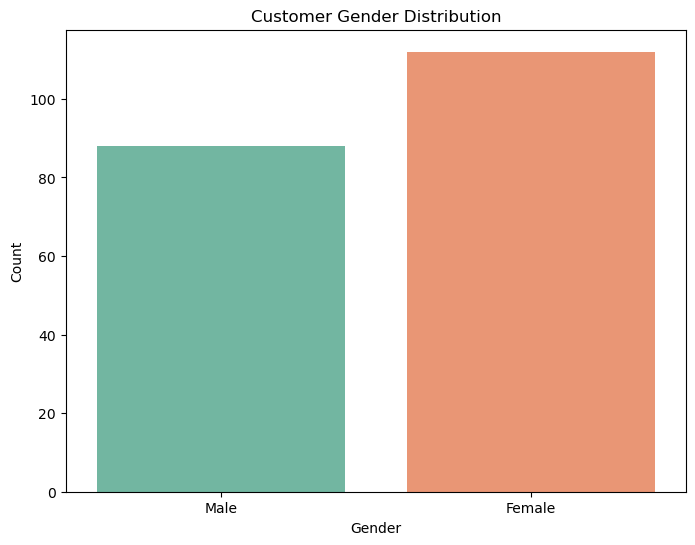

In [140]:
# Gender distribution 
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Gender', palette='Set2')
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

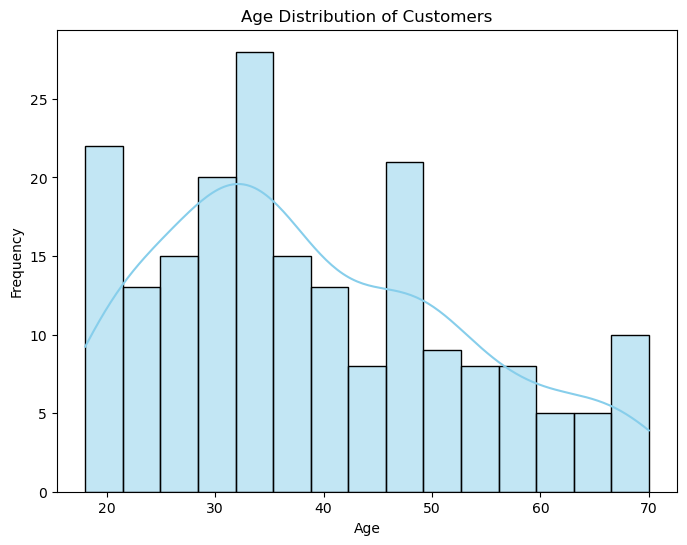

In [141]:
# Age Distribution 
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'], kde=True, color='skyblue', bins=15)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_59307/3343838677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Gender', y='Spending Score (1-100)', palette='Set2')


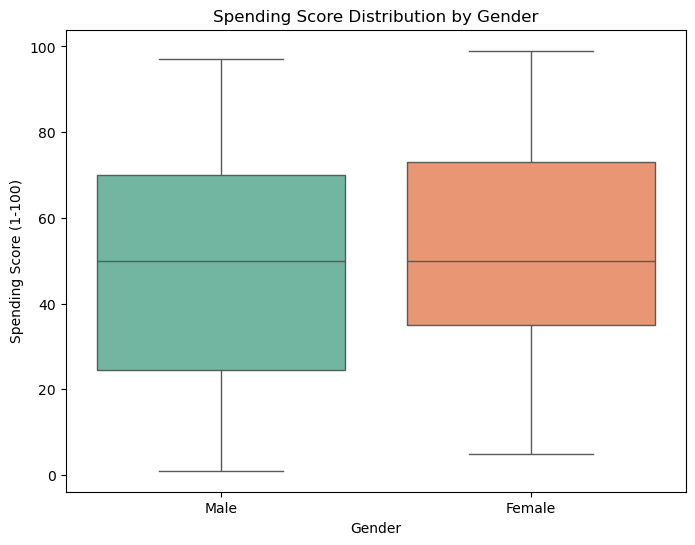

In [142]:
# Spending score by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Gender', y='Spending Score (1-100)', palette='Set2')
plt.title("Spending Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()

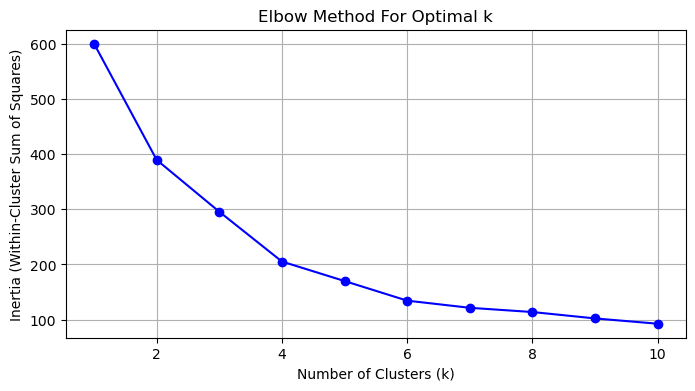

In [143]:
inertia = []
K = range(1, 11)  # Try cluster numbers from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

Number of clusters: 2, Silhouette Score: 0.335, Inertia: 389.386
Number of clusters: 3, Silhouette Score: 0.358, Inertia: 295.212
Number of clusters: 4, Silhouette Score: 0.404, Inertia: 205.225
Number of clusters: 5, Silhouette Score: 0.417, Inertia: 168.248
Number of clusters: 6, Silhouette Score: 0.428, Inertia: 133.868
Number of clusters: 7, Silhouette Score: 0.417, Inertia: 117.012
Number of clusters: 8, Silhouette Score: 0.408, Inertia: 103.873
Number of clusters: 9, Silhouette Score: 0.418, Inertia: 93.093
Number of clusters: 10, Silhouette Score: 0.407, Inertia: 82.385


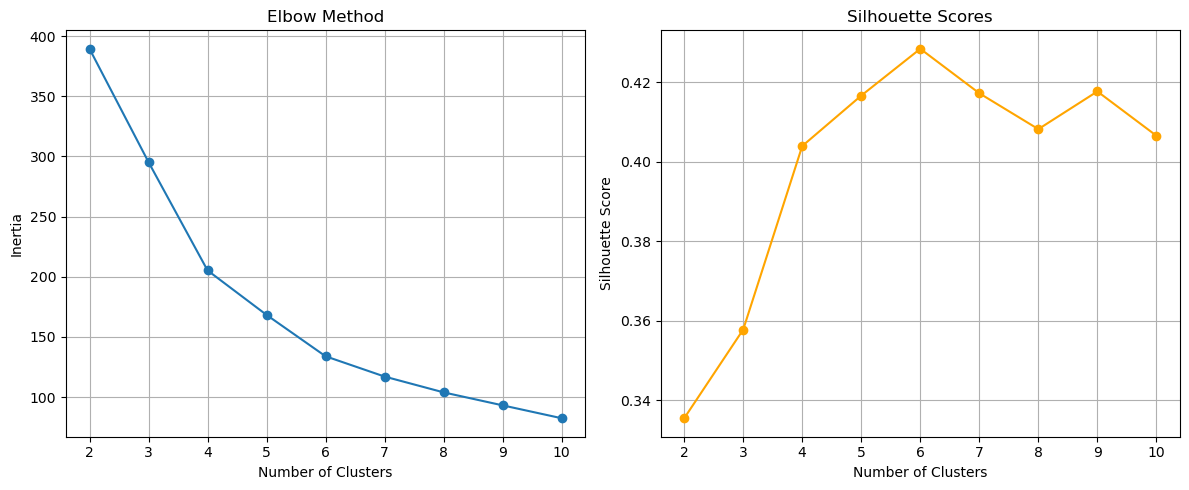

In [144]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant features
df_features = df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# Define range of clusters to test
range_n_clusters = range(2, 11)
inertia = []
silhouette_scores = []

# Loop through cluster values
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=1000, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.3f}, Inertia: {kmeans.inertia_:.3f}")

# Optional: Plot both metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

The optimal number of clusters is 6, as it achieves the highest silhouette score (0.428) with significantly reduced inertia, indicating well-separated and compact clusters.

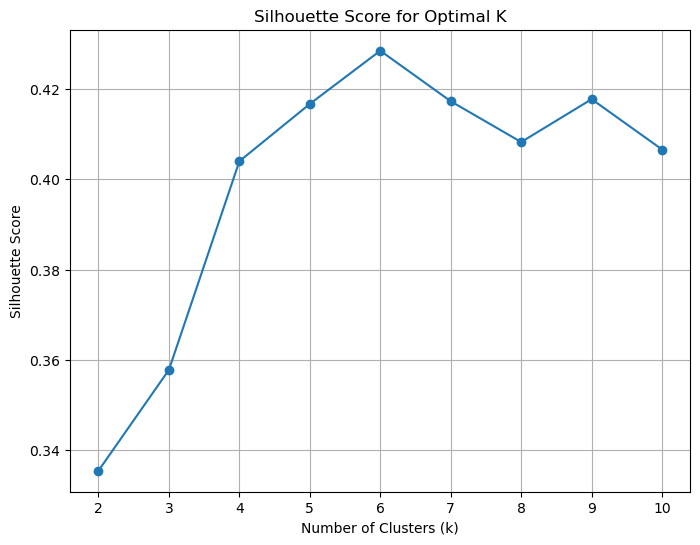

In [145]:
# Plot the Silhouette Score graph
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

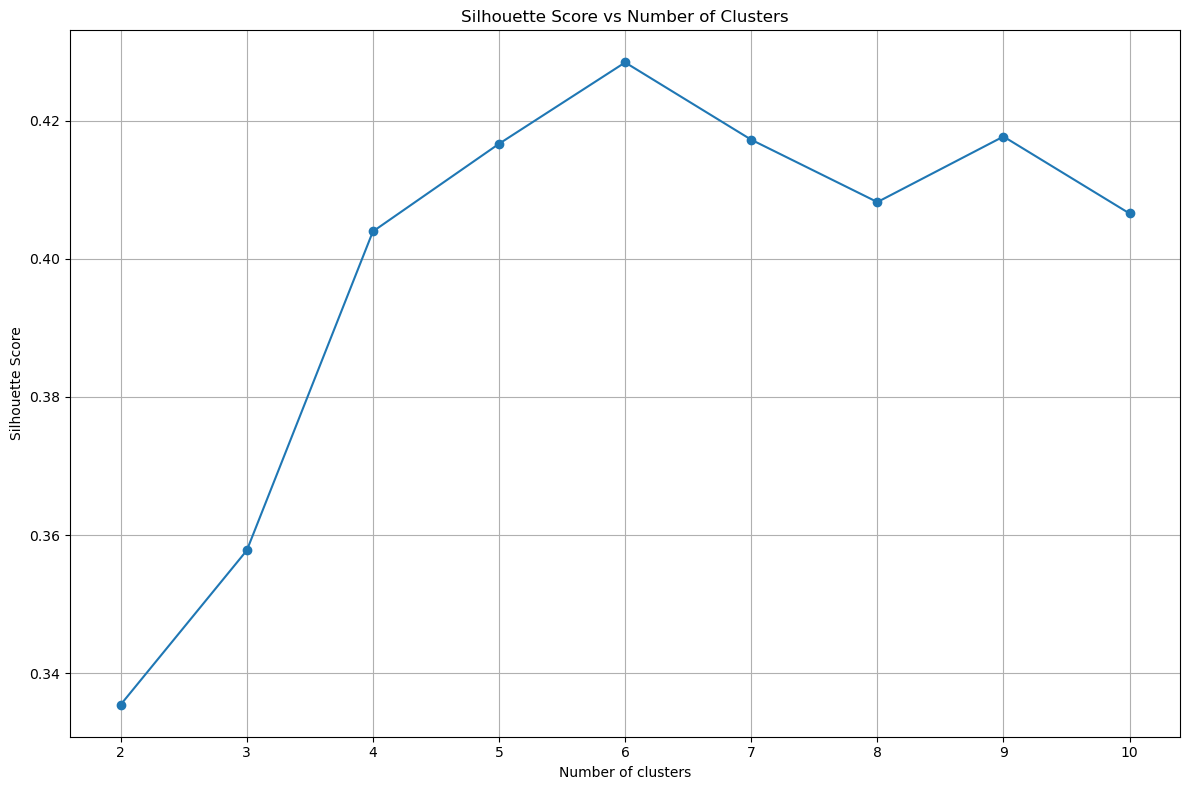

In [146]:
plt.figure(figsize=(12, 8))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.grid(True)
plt.show()

In [147]:
# Choose the best k (based on max silhouette score and min inertia)
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
best_k_elbow = range_n_clusters[inertia.index(min(inertia))]  # Use min here

print(f"Best number of clusters based on Silhouette scores: {best_k}")
print(f"Best number of clusters based on Elbow method: {best_k_elbow}")

#elbow is dropping after 10

Best number of clusters based on Silhouette scores: 6
Best number of clusters based on Elbow method: 10


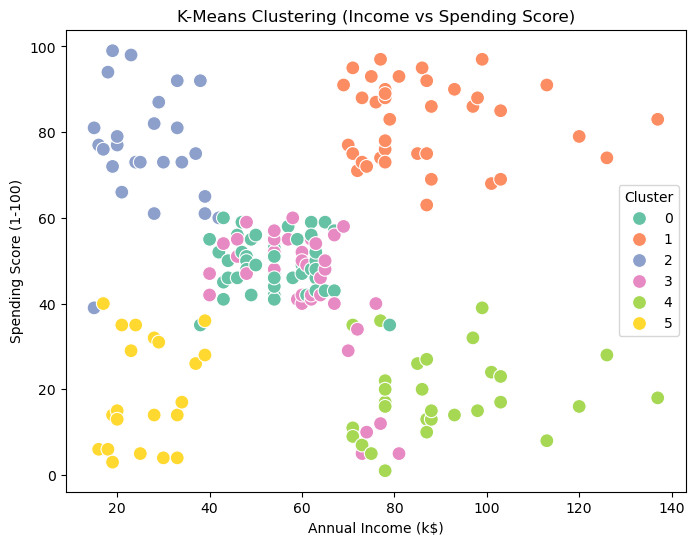

In [153]:
kmeans = KMeans(n_clusters=6, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

# Create a 2D scatter plot with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("K-Means Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

In [149]:
# Calculate Silhouette Score
sil_score = silhouette_score(scaled_features, df_cleaned['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.43106526216603014


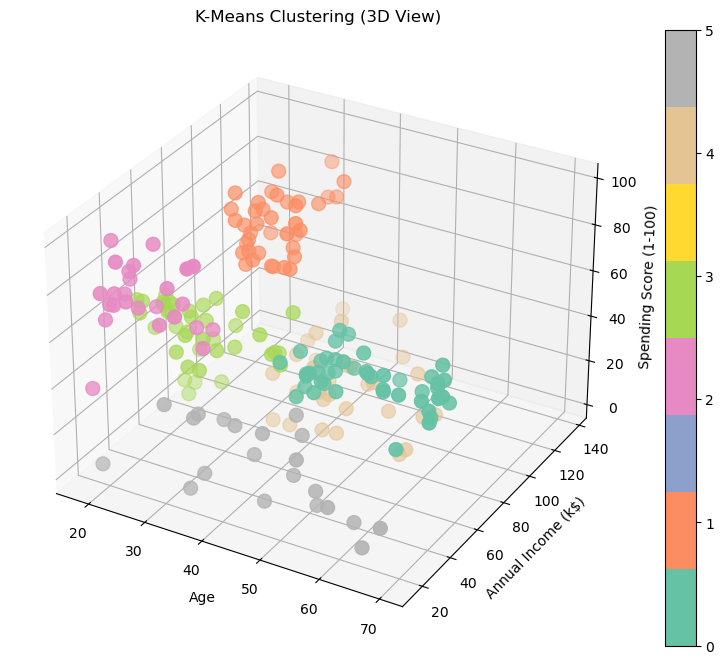

In [150]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with different cluster colors
scatter = ax.scatter(df_cleaned['Age'], df_cleaned['Annual Income (k$)'], df_cleaned['Spending Score (1-100)'], 
                     c=df_cleaned['Cluster'], cmap='Set2', s=100)

# Labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("K-Means Clustering (3D View)")

# # Add color bar
plt.colorbar(scatter)
plt.show()

With a score of 0.43, your clusters are moderately good, but they could be more distinct or better separated.